# Test data loader

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


class woman


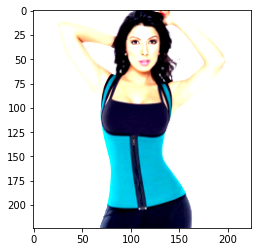

In [2]:
from data.data import CIFARData
from config import configs
data = CIFARData(configs)
data.show_batch("test")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


class men


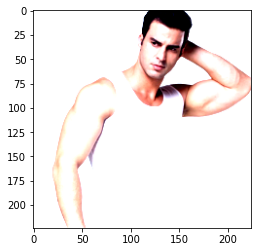

In [3]:
data.show_batch("train")

# Test trainer

In [4]:
from train.train import Trainer

In [5]:
import torch
trainer = Trainer(configs, data)
trainer.load_checkpoint("checkpoint_19")
output1, label1 = trainer.get_output("test")

In [6]:
trainer.metric(output1, label1)

tensor(0.9369)

In [7]:
configs.batch_size = 4
data = CIFARData(configs)
trainer = Trainer(configs, data)
trainer.load_checkpoint("checkpoint_19")
output2, label2 = trainer.get_output("test")
trainer.metric(output2, label2)

tensor(0.9369)

In [8]:
configs.batch_size = 8
data = CIFARData(configs)
trainer = Trainer(configs, data)
trainer.load_checkpoint("checkpoint_19")
output3, label3 = trainer.get_output("test")
trainer.metric(output3, label3)

tensor(0.9369)

In [10]:
from utils.metric import Precision
trainer.evaluate("test", Precision())

RuntimeError: The size of tensor a (10) must match the size of tensor b (333) at non-singleton dimension 1

In [ ]:
for i in range(len(output1)):
    for j in range(len(output3)):
        if (output1[i] == output3[j]).sum().item() > 0:
            print(i, j)

In [ ]:
data.train_dataset[0][0]

In [ ]:
from utils.metric import Accuracy
trainer.evaluate("test", Accuracy())

In [ ]:
configs.batch_size = 32
trainer = Trainer(configs, data)
trainer.load_checkpoint("checkpoint_19")
trainer.evaluate("test")

# # Test metric

In [ ]:
from utils.metric import Accuracy
import torch

In [ ]:
class Accuracy:
    def __init__(self, threshold = 0.5, from_logits:bool = True):
        self.threshold = threshold
        self.from_logis = from_logits
    
    def __call__(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        if self.from_logis:
            y_pred, y_true = self._conversion(y_pred, y_true, self.threshold)
        return torch.mean((y_pred == y_true).float())
    
    def _conversion(self, y_pred, y_true, threshold):
        if len(y_pred.shape) == len(y_true.shape) + 1:
            y_pred = torch.argmax(y_pred, dim = 1)
        if len(y_pred.shape) == len(y_true.shape) and y_pred.dtype == torch.float:
            y_pred = (y_pred > threshold).float()
        return y_pred, y_true

In [ ]:
import torch
torch.clip

In [ ]:
class Precision:
    def __init__(self, epsilon = 1e-10):
        self.epsilon = epsilon

    def __call__(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        true_positive = torch.sum(torch.round(torch.clamp(y_pred*y_true, 0, 1)))
        num_positive = torch.sum(torch.round(torch.clamp(y_pred, 0, 1)))
        return true_positive/(num_positive+self.epsilon)

In [ ]:
from utils.metric import Fbeta_Score
import torch
x = torch.Tensor([1, 0, 1, 1])
# y = torch.zeros((4,), dtype = torch.int64)
y = torch.Tensor([0, 1, 0, 1])

betaScore = Fbeta_Score()
betaScore(x, y)

In [ ]:
from utils.metric import IOU

import torch
x = torch.tensor([[
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
]])
y = torch.tensor([[
    [1, 0, 0],
    [1, 1, 0],
    [1, 0, 0],
]])
iou = IOU(0.5)
iou(x, y)


# Split train test

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from dataset.MenWomanDataset import split_train_test_folder
split_train_test_folder('E:\data\MenWoman', 0.9)

In [ ]:
import os
def load_train_img(file_path):
    print(file_path)
    file_ = open(file_path, "r")
    list_ = file_.readlines()
    list_img = []
    list_label = []
    for line in list_:
        img_name, label = line.replace("\n","").split(",")
        list_img.append(img_name)
        list_label.append(int(label))
    return list_img, list_label
list_img, list_label = load_train_img("E:\data\data\\test.txt")

from skimage import io
io.imread(os.path.join("E:\data\data", list_img[0]))

In [ ]:
from skimage import io


In [ ]:
import numpy as np
import torch

class Accuracy:
    def __init__(self, threshold = 0.5, from_logits:bool = True):
        self.threshold = threshold
        self.from_logis = from_logits
    
    def __call__(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        if self.from_logis:
            y_pred, y_true = self._conversion(y_pred, y_true, self.threshold)
        return torch.mean((y_pred == y_true).float())
    
    def _conversion(self, y_pred, y_true, threshold):
        if len(y_pred.shape) == len(y_true.shape) + 1:
            y_pred = torch.argmax(y_pred, dim = 1)
        if len(y_pred.shape) == len(y_true.shape) and y_pred.dtype == torch.float:
            y_pred = (y_pred > threshold).float()
        return y_pred, y_true
acc2 = Accuracy()
trainer.metric = acc2